http://docs.pymc.io/notebooks/rugby_analytics.html

In [2]:
!date

import numpy as np
import pandas as pd
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
%matplotlib inline
import pymc3 as pm, theano.tensor as tt

Wed Nov 22 20:58:29 UTC 2017


In [3]:
df = pd.read_csv('2017_2018.csv')
df

,DATUM,HEMMA,BORTA,HS,-,VS,DEC,PERIOD,ARENA,ATT
0,2018-03-10,Skellefteå,Karlskrona,-,-,-,-,NaN,Skellefteå Kraft Arena,-
1,2018-03-10,Örebro,Djurgården,-,-,-,-,NaN,Behrn Arena,-
2,2018-03-10,Rögle,Luleå,-,-,-,-,NaN,Lindab Arena,-
3,2018-03-10,Färjestad,HV71,-,-,-,-,NaN,Löfbergs Arena,-
4,2018-03-10,Linköping,Växjö Lakers,-,-,-,-,NaN,Saab Arena,-
5,2018-03-10,Frölunda,Brynäs,-,-,-,-,NaN,Scandinavium,-
6,2018-03-10,Malmö,Mora,-,-,-,-,NaN,Malmö Arena,-
7,2018-03-08,Luleå,Skellefteå,-,-,-,-,NaN,Coop Norrbotten Arena,-
8,2018-03-08,Mora,Örebro,-,-,-,-,NaN,Jalas Arena,-
9,2018-03-08,Brynäs,Linköping,-,-,-,-,NaN,Gavlerinken Arena,-


In [4]:
df = pd.read_csv('2017_2018.csv')
df = df[['DATUM','HEMMA', 'BORTA', 'HS', 'VS']]
df.columns = ['date','home_team','away_team','home_score','away_score']
df.head(5)
#df_all_games = df.copy()
#df = df[df['home_score'] != '-']
#df_games = df.copy()

,date,home_team,away_team,home_score,away_score
0,2018-03-10,Skellefteå,Karlskrona,-,-
1,2018-03-10,Örebro,Djurgården,-,-
2,2018-03-10,Rögle,Luleå,-,-
3,2018-03-10,Färjestad,HV71,-,-
4,2018-03-10,Linköping,Växjö Lakers,-,-


In [5]:

teams = df.home_team.unique()
teams = pd.DataFrame(teams, columns=['team'])
teams['i'] = teams.index
df = pd.merge(df, teams, left_on='home_team', right_on='team', how='left')
df = df.rename(columns = {'i': 'i_home'}).drop('team', 1)

df = pd.merge(df, teams, left_on='away_team', right_on='team', how='left')
df = df.rename(columns = {'i': 'i_away'}).drop('team', 1)

df_all_games = df.copy()
df_all_games

df = df[df['home_score'] != '-']

observed_home_goals = df.home_score.values
observed_away_goals = df.away_score.values

home_team = df.i_home.values
away_team = df.i_away.values

num_teams = len(df.i_home.drop_duplicates())
num_games = len(home_team)

df_played_games = df.copy()
#g = df.groupby('i_away')
#att_starting_points = np.log(g.away_score.mean())
#g = df.groupby('i_home')
#def_starting_points = -np.log(g.away_score.mean())

In [6]:
df_played_games

,date,home_team,away_team,home_score,away_score,i_home,i_away
226,2017-11-21,Rögle,Örebro,6,1,2,1
227,2017-11-21,Malmö,Frölunda,2,3,6,5
228,2017-11-21,Luleå,Skellefteå,1,3,7,0
229,2017-11-21,Linköping,Brynäs,4,3,4,9
230,2017-11-21,Växjö Lakers,Färjestad,2,4,11,3
231,2017-11-18,Karlskrona,Djurgården,1,0,12,10
232,2017-11-18,Mora,Luleå,3,2,8,7
233,2017-11-18,Frölunda,Örebro,3,1,5,1
234,2017-11-18,Brynäs,Malmö,5,3,9,6
235,2017-11-18,Växjö Lakers,Skellefteå,4,2,11,0


In [7]:
model = pm.Model()
with pm.Model() as model:
    # global model parameters
    home = pm.Flat('home')
    sd_att = pm.HalfStudentT('sd_att', nu=3, sd=2.5)
    sd_def = pm.HalfStudentT('sd_def', nu=3, sd=2.5)
    intercept = pm.Flat('intercept')

    # team-specific model parameters
    atts_star = pm.Normal("atts_star", mu=0, sd=sd_att, shape=num_teams)
    defs_star = pm.Normal("defs_star", mu=0, sd=sd_def, shape=num_teams)

    atts = pm.Deterministic('atts', atts_star - tt.mean(atts_star))
    defs = pm.Deterministic('defs', defs_star - tt.mean(defs_star))
    home_theta = tt.exp(intercept + home + atts[home_team] + defs[away_team])
    away_theta = tt.exp(intercept + atts[away_team] + defs[home_team])

    # likelihood of observed data
    home_points = pm.Poisson('home_points', mu=home_theta, observed=observed_home_goals)
    away_points = pm.Poisson('away_points', mu=away_theta, observed=observed_away_goals)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 4992/5000 [00:28<00:00, 177.68it/s]/opt/conda/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 2 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 5000/5000 [00:28<00:00, 177.63it/s]


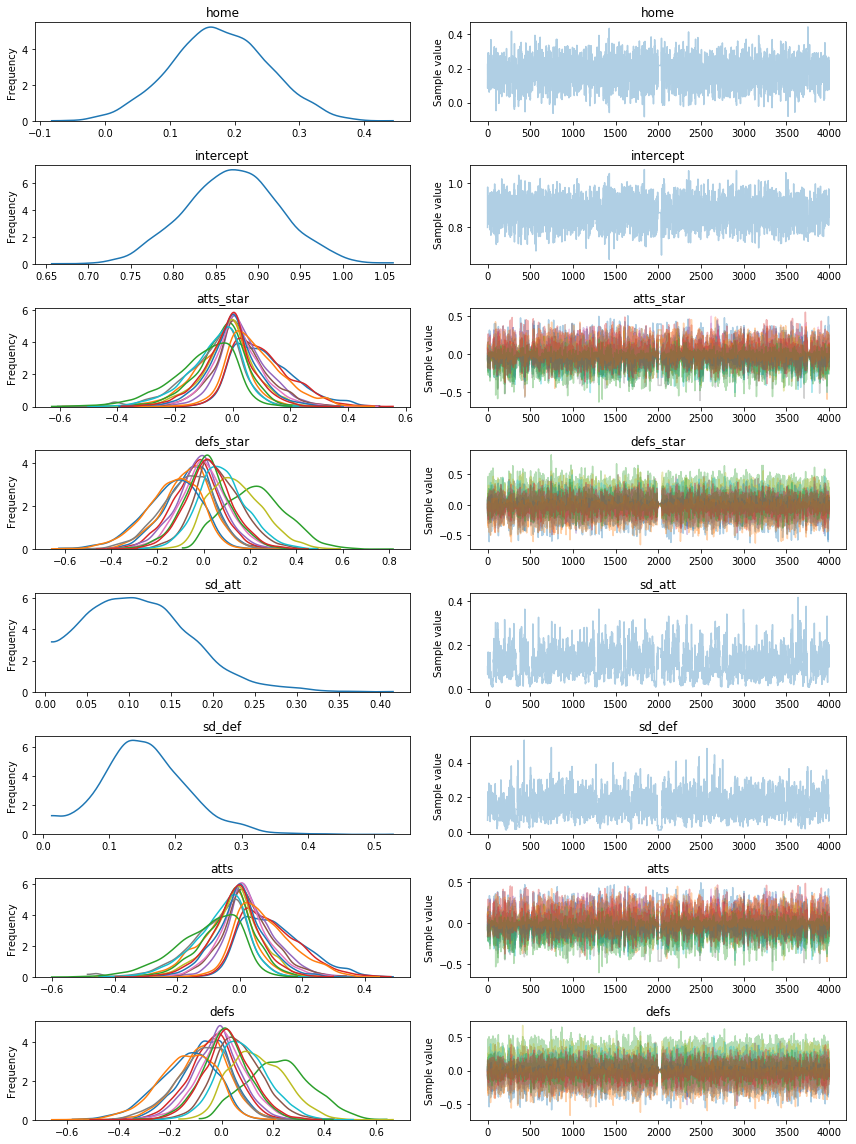

In [8]:
with model:
    trace = pm.sample(4000, tune=1000)
    pm.traceplot(trace)

In [9]:
with pm.Model() as model2:
    # global model parameters
    home = pm.Flat('home')
    sd_att = pm.HalfStudentT('sd_att', nu=3, sd=2.5)
    sd_def = pm.HalfStudentT('sd_def', nu=3, sd=2.5)
    intercept = pm.Flat('intercept')
    
    shaper = pm.Exponential('shaper', 1/10)

    # team-specific model parameters
    atts_star = pm.Normal("atts_star", mu=0, sd=sd_att, shape=num_teams)
    defs_star = pm.Normal("defs_star", mu=0, sd=sd_def, shape=num_teams)

    atts = pm.Deterministic('atts', atts_star - tt.mean(atts_star))
    defs = pm.Deterministic('defs', defs_star - tt.mean(defs_star))
    home_theta = tt.exp(intercept + home + atts[home_team] + defs[away_team])
    away_theta = tt.exp(intercept + atts[away_team] + defs[home_team])

    # likelihood of observed data
    home_points = pm.NegativeBinomial('home_points', mu=home_theta, alpha = shaper, observed=observed_home_goals)
    away_points = pm.NegativeBinomial('away_points', mu=away_theta, alpha = shaper, observed=observed_away_goals)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 4986/5000 [00:34<00:00, 142.65it/s]/opt/conda/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 5000/5000 [00:35<00:00, 142.75it/s]


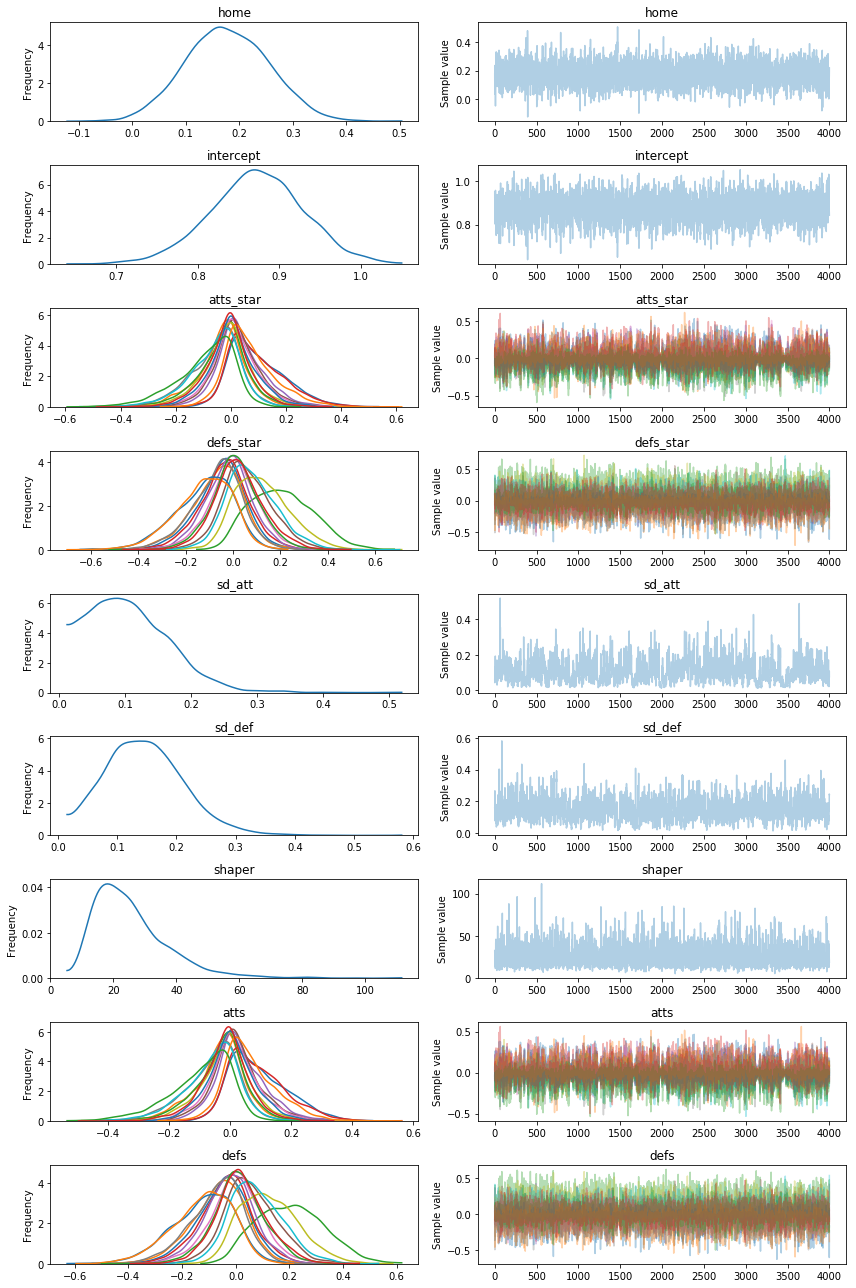

In [10]:
with model2:
    trace2 = pm.sample(4000, tune=1000)
    pm.traceplot(trace2)

In [11]:
df_comp_WAIC = pm.compare((trace, trace2), (model, model2))

In [12]:
df_comp_WAIC

,WAIC,pWAIC,dWAIC,weight,SE,dSE,warning
0,1040.46,15.27,0,0.85,22.97,0,1
1,1041.61,12.52,1.16,0.15,21.01,2.56,1


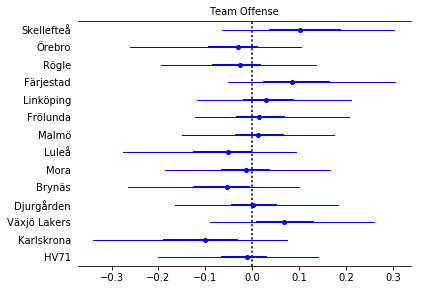

In [8]:
labels = teams['team'].tolist()
pm.forestplot(trace, varnames=['atts'],  ylabels=labels, main="Team Offense")

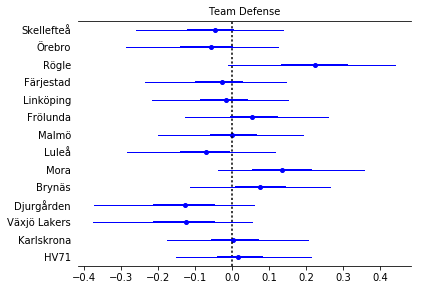

In [9]:
labels = teams['team'].tolist()
pm.forestplot(trace, varnames=['defs'],  ylabels=labels, main="Team Defense")

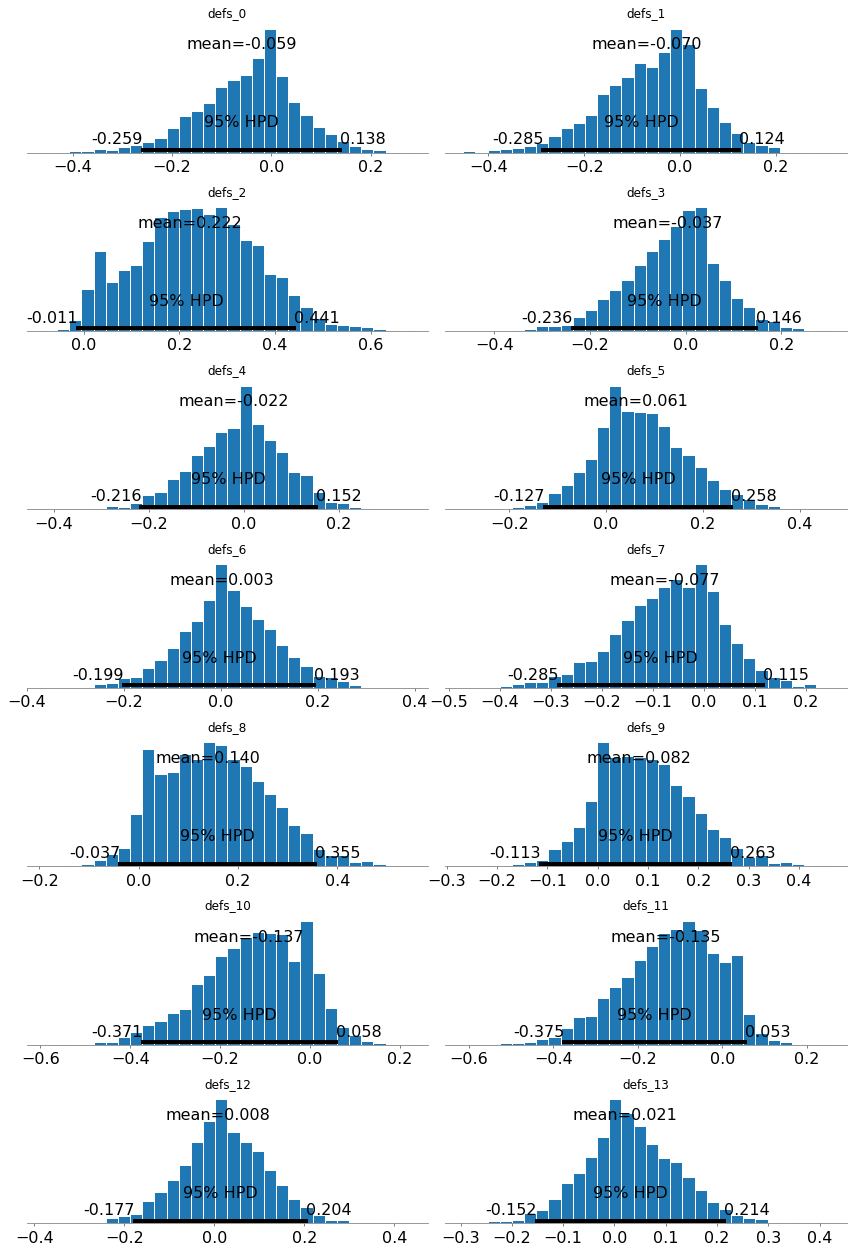

In [10]:
pm.plot_posterior(trace, varnames=['defs']);

In [11]:
df_trace = pm.trace_to_dataframe(trace)

In [12]:
pd.concat([df_trace.head(5),df_trace.tail(5)])

,home,intercept,atts_star__0,atts_star__1,atts_star__2,atts_star__3,atts_star__4,atts_star__5,atts_star__6,atts_star__7,...,defs__4,defs__5,defs__6,defs__7,defs__8,defs__9,defs__10,defs__11,defs__12,defs__13
0,0.152128,0.907822,0.314802,-0.117890,-0.122515,0.102099,0.110326,0.096082,0.179797,0.003113,...,-0.033500,0.007548,0.107619,-0.066951,0.073357,0.005723,-0.050270,-0.047891,-0.096471,0.010728
1,0.150588,0.818949,-0.046986,-0.150819,0.044810,0.061279,0.156348,0.066344,-0.133244,-0.113106,...,0.002731,0.031827,-0.138174,0.011221,0.021866,0.063024,-0.037825,-0.042304,0.089774,-0.017023
2,0.175526,0.891246,0.165609,-0.126852,0.106859,0.215393,0.041684,-0.038653,-0.027072,-0.191890,...,0.050106,-0.004535,0.158832,-0.184839,0.236951,-0.004139,-0.203183,-0.123997,-0.048130,-0.005427
3,0.256342,0.838650,0.071471,-0.025921,-0.157254,-0.012180,0.002290,0.040594,0.017669,-0.011339,...,-0.092867,0.200235,-0.209829,-0.033149,0.125236,0.158605,-0.272001,-0.133276,0.079415,0.074288
4,0.218106,0.898802,0.064606,-0.019430,0.170591,0.013921,0.026695,-0.030970,-0.033128,-0.058049,...,-0.018947,0.113300,0.102529,-0.063294,0.102930,0.078396,-0.171780,-0.208832,-0.086160,-0.135353
3995,0.078598,0.935238,0.006584,-0.000804,0.022940,0.059881,-0.058810,-0.006770,0.004734,-0.039677,...,-0.114320,0.137036,0.094402,-0.129056,0.196779,0.177691,-0.065676,-0.242374,-0.062723,0.004664
3996,0.083800,0.955386,-0.024349,-0.016979,-0.009178,-0.028520,-0.025303,0.034852,0.024515,0.001543,...,-0.117643,0.227569,0.012094,-0.087943,0.090950,0.231523,-0.108550,-0.272634,-0.065085,-0.000678
3997,0.217759,0.829482,0.028816,0.000358,-0.047460,-0.017516,0.079489,-0.035729,0.029901,-0.013686,...,-0.057128,0.135028,-0.121708,-0.283034,0.153114,0.320132,-0.094757,-0.140943,0.005002,0.119016
3998,0.196545,0.799168,-0.010376,-0.055296,-0.032971,0.029576,0.008609,-0.005862,0.002779,-0.058056,...,-0.093481,0.201478,0.013556,-0.367900,0.191156,0.216160,-0.233183,-0.052053,0.135411,0.081875
3999,0.085132,0.922627,-0.038205,0.057132,-0.017164,0.007041,-0.005675,0.009852,-0.039762,0.018942,...,-0.037407,-0.030065,-0.083565,0.122805,-0.067905,0.103562,-0.132183,-0.204000,-0.110675,0.008283


In [13]:
df_all_games

,date,home_team,away_team,home_score,away_score,i_home,i_away
0,2018-03-10,Skellefteå,Karlskrona,-,-,0,12
1,2018-03-10,Örebro,Djurgården,-,-,1,10
2,2018-03-10,Rögle,Luleå,-,-,2,7
3,2018-03-10,Färjestad,HV71,-,-,3,13
4,2018-03-10,Linköping,Växjö Lakers,-,-,4,11
5,2018-03-10,Frölunda,Brynäs,-,-,5,9
6,2018-03-10,Malmö,Mora,-,-,6,8
7,2018-03-08,Luleå,Skellefteå,-,-,7,0
8,2018-03-08,Mora,Örebro,-,-,8,1
9,2018-03-08,Brynäs,Linköping,-,-,9,4


In [14]:
def simulate_season():
    """
    Simulate a season once, using one random draw from the mcmc chain. 
    """
    num_samples = trace['atts'].shape[0]
    draw = np.random.randint(0, num_samples)
    atts_draw = pd.DataFrame({'att': trace['atts'][draw, :],})
    defs_draw = pd.DataFrame({'def': trace['defs'][draw, :],})
    home_draw = trace['home'][draw]
    intercept_draw = trace['intercept'][draw]
    season = df_all_games.copy()
    season = pd.merge(season, atts_draw, left_on='i_home', right_index=True)
    season = pd.merge(season, defs_draw, left_on='i_home', right_index=True)
    season = season.rename(columns = {'att': 'att_home', 'def': 'def_home'})
    season = pd.merge(season, atts_draw, left_on='i_away', right_index=True)
    season = pd.merge(season, defs_draw, left_on='i_away', right_index=True)
    season = season.rename(columns = {'att': 'att_away', 'def': 'def_away'})
    season['home'] = home_draw
    season['intercept'] = intercept_draw
    season['home_theta'] = season.apply(lambda x: np.exp(x['intercept'] + 
                                                           x['home'] + 
                                                           x['att_home'] + 
                                                           x['def_away']), axis=1)
    season['away_theta'] = season.apply(lambda x: np.exp(x['intercept'] + 
                                                           x['att_away'] + 
                                                           x['def_home']), axis=1)
    season['home_goals'] = season.apply(lambda x: np.random.poisson(x['home_theta']), axis=1)
    season['away_goals'] = season.apply(lambda x: np.random.poisson(x['away_theta']), axis=1)
    season['home_outcome'] = season.apply(lambda x: 'win' if x['home_goals'] > x['away_goals'] else 
                                                    'loss' if x['home_goals'] < x['away_goals'] else 'draw', axis=1)
    season['away_outcome'] = season.apply(lambda x: 'win' if x['home_goals'] < x['away_goals'] else 
                                                    'loss' if x['home_goals'] > x['away_goals'] else 'draw', axis=1)
    season = season.join(pd.get_dummies(season.home_outcome, prefix='home'))
    season = season.join(pd.get_dummies(season.away_outcome, prefix='away'))
    return season


def create_season_table(season):
    """
    Using a season dataframe output by simulate_season(), create a summary dataframe with wins, losses, goals for, etc.
    
    """
    g = season.groupby('i_home')    
    home = pd.DataFrame({'home_goals': g.home_goals.sum(),
                         'home_goals_against': g.away_goals.sum(),
                         'home_wins': g.home_win.sum(),
                         'home_draws': g.home_draw.sum(),
                         'home_losses': g.home_loss.sum()
                         })
    g = season.groupby('i_away')    
    away = pd.DataFrame({'away_goals': g.away_goals.sum(),
                         'away_goals_against': g.home_goals.sum(),
                         'away_wins': g.away_win.sum(),
                         'away_draws': g.away_draw.sum(),
                         'away_losses': g.away_loss.sum()
                         })
    df = home.join(away)
    df['wins'] = df.home_wins + df.away_wins
    df['draws'] = df.home_draws + df.away_draws
    df['losses'] = df.home_losses + df.away_losses
    df['points'] = df.wins * 3 + df.draws
    df['gf'] = df.home_goals + df.away_goals
    df['ga'] = df.home_goals_against + df.away_goals_against
    df['gd'] = df.gf - df.ga
    df = pd.merge(teams, df, left_on='i', right_index=True)
    df = df.sort_index(by='points', ascending=False)
    df = df.reset_index()
    df['position'] = df.index + 1
    df['champion'] = (df.position == 1).astype(int)
    df['qualified_for_CL'] = (df.position < 5).astype(int)
    df['relegated'] = (df.position > 17).astype(int)
    return df  
    
def simulate_seasons(n=10):
    dfs = []
    for i in range(n):
        s = simulate_season()
        print( s.head(3))
        t = create_season_table(s)
        t['iteration'] = i
        dfs.append(t)
    return pd.concat(dfs, ignore_index=True)

def simulate_date_outcomes(n=3):
    dfs = []
    for i in range(n):
        if (i % 100 == 0):
            print("Simulation number: {}".format(i))
        s = simulate_season()
        #s = s[s['date'] == date]
        s['iteration'] = i
        s = s[['date','home_team', 'away_team','home_draw', 'home_loss', 'home_win']]
        dfs.append(s)
        
    df = pd.concat(dfs, ignore_index=True)
    df = df.groupby(['date','home_team', 'away_team']).sum()
    return df

In [15]:
df = simulate_date_outcomes(1000)
df_simul = df.copy()

Simulation number: 0
Simulation number: 100
Simulation number: 200
Simulation number: 300
Simulation number: 400
Simulation number: 500
Simulation number: 600
Simulation number: 700
Simulation number: 800
Simulation number: 900


In [20]:
12

12

In [24]:
df = df_simul.copy()
df = df.reset_index()
df = df[df['date'] == '2017-11-23'].head(20)

df['home_win_odds'] = 1000/df['home_win']
df['home_draw_odds'] = 1000/df['home_draw']
df['away_win_odds'] = 1000/df['home_loss']

df

,date,home_team,away_team,home_draw,home_loss,home_win,home_win_odds,home_draw_odds,away_win_odds
138,2017-11-23,Frölunda,Rögle,150.0,244.0,606.0,1.650165,6.666667,4.098361
139,2017-11-23,HV71,Djurgården,161.0,445.0,394.0,2.538071,6.211180,2.247191
140,2017-11-23,Karlskrona,Brynäs,193.0,320.0,487.0,2.053388,5.181347,3.125000
141,2017-11-23,Linköping,Mora,130.0,259.0,611.0,1.636661,7.692308,3.861004
142,2017-11-23,Malmö,Växjö Lakers,170.0,421.0,409.0,2.444988,5.882353,2.375297
143,2017-11-23,Skellefteå,Luleå,155.0,292.0,553.0,1.808318,6.451613,3.424658
144,2017-11-23,Örebro,Färjestad,171.0,356.0,473.0,2.114165,5.847953,2.808989


In [22]:
import matplotlib as plt
import seaborn as sns

In [23]:
ax = simuls.points[simuls.team == 'Rögle'].hist(figsize=(7,5))
median = simuls.points[simuls.team == 'Rögle'].median()
ax.set_title('xx')
ax.plot([median, median], ax.get_ylim())
#plt.annotate('Median: %s' % median, xy=(median + 1, ax.get_ylim()[1]-10))
print (median)

NameError: name 'simuls' is not defined

In [ ]:
df


In [ ]:
import matplotlib.pyplot as plt
g = simuls.groupby('team')
season_hdis = pd.DataFrame({'points_lower': g.points.quantile(.05),
                            'points_upper': g.points.quantile(.95),
                            'goals_for_lower': g.gf.quantile(.05),
                            'goals_for_median': g.gf.median(),
                            'goals_for_upper': g.gf.quantile(.95),
                            'goals_against_lower': g.ga.quantile(.05),
                            'goals_against_upper': g.ga.quantile(.95),
                            })
#season_hdis = pd.merge(season_hdis, df, left_index=True, right_on='team')
column_order = ['points_lower',  'points_upper', 
                'goals_for_lower', 'goals_for_median', 'goals_for_upper',
                'goals_against_lower',  'goals_against_upper',]
season_hdis = season_hdis[column_order]
season_hdis['relative_goals_upper'] = season_hdis.goals_for_upper - season_hdis.goals_for_median
season_hdis['relative_goals_lower'] = season_hdis.goals_for_median - season_hdis.goals_for_lower
season_hdis = season_hdis.reset_index()
season_hdis['x'] = season_hdis.index + .5
season_hdis

fig, axs = plt.subplots(figsize=(10,6))
#axs.scatter(season_hdis.x, season_hdis.GF, c=sns.palettes.color_palette()[4], zorder = 10, label='Actual Goals For')
axs.errorbar(season_hdis.x, season_hdis.goals_for_median, 
             yerr=(season_hdis[['relative_goals_lower', 'relative_goals_upper']].values).T, 
             fmt='s', c=sns.palettes.color_palette()[5], label='Simulations')
axs.set_title('Actual Goals For, and 90% Interval from Simulations, by Team')
axs.set_xlabel('Team')
axs.set_ylabel('Goals Scored')
axs.set_xlim(0, 20)
axs.legend()
_= axs.set_xticks(season_hdis.index + .5)
_= axs.set_xticklabels(season_hdis['team'].values, rotation=45)


In [ ]:
df_winner = simuls[simuls['champion'] ==1].copy()
calc_odds = 1000/df_winner.groupby('team').count()['index'].sort_values(ascending = False)
calc_odds

In [ ]:
res = '''4,60
Växjö Lakers
5,90
Frölunda
7,00
Skellefteå
7,50
Färjestad
8,00
HV71
11,00
Djurgården
11,50
Malmö
15,00
Linköping
20,00
Luleå
21,00
Brynäs
35,00
Örebro
125,00
Karlskrona
125,00
Rögle
125,00
Mora'''
res = res.replace(",",'.')
res = res.split("\n")
odds = pd.DataFrame(columns = ['team', 'odds'])
for i in range(0,len(res), 2):
    dfi = pd.DataFrame([[res[i+1],res[i]]], columns = ['team', 'odds'])
    odds = odds.append(dfi)
    
odds = odds.set_index('team')

In [ ]:
df = odds.join(calc_odds)
df.columns = ['odds', 'calc_odds']
df['odds'] = df['odds'].astype(float)
df['diff'] = df['odds'] - df['calc_odds']
df = df.sort_values('diff')
df

In [ ]:
simuls

In [14]:
%load_ext watermark

ModuleNotFoundError: No module named 'watermark'